In [ ]:
# https://github.com/pranaysawant/Memes-Classification-Model-End-to-End-Solution

In [1]:
#     ! pip3 install -q tf-nightly
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import tensorflow as tf



tr_dir= './data/train/'
val_dir = './data/validate/'
test_dir = './data/test/'


In [2]:
# change as you want
batch_size = 32
img_height = 128
img_width = 128

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  tr_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  tr_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

tst_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = val_ds.class_names
print(class_names)


Found 4743 files belonging to 2 classes.
Using 4269 files for training.
Found 4743 files belonging to 2 classes.
Using 474 files for validation.
Found 263 files belonging to 2 classes.
Using 131 files for validation.
['memes', 'not-memes']


In [5]:
cnt_mem= 0
cnt_real = 0
for im, lab in train_ds:
    for i in range(0,len(lab)):
        if class_names[lab[i]] == "memes":
            cnt_mem = cnt_mem+1
        else:
            cnt_real = cnt_real+1
        
print(cnt_mem)
print(cnt_real)
    

2479
1790


In [6]:
cnt_mem= 0
cnt_real = 0
for im, lab in tst_ds:
    for i in range(0,len(lab)):
        if class_names[lab[i]] == "memes":
            cnt_mem = cnt_mem+1
        else:
            cnt_real = cnt_real+1
        
print(cnt_mem)
print(cnt_real)

33
98


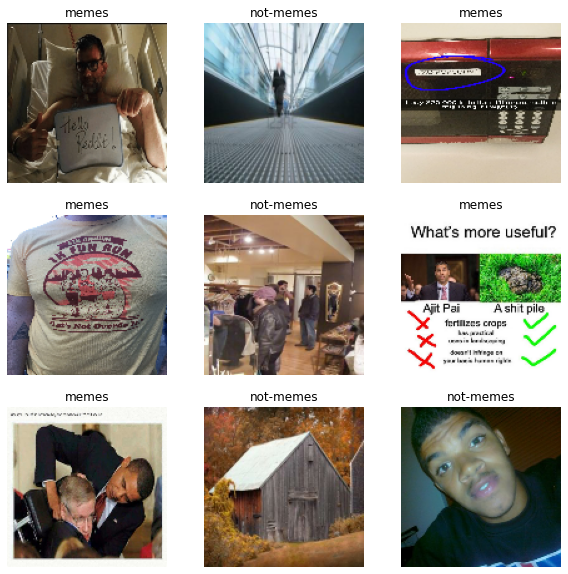

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 128, 3)
(32,)


In [9]:
from tensorflow.keras import layers


In [10]:


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
tst_ds = tst_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
134/134 [==============================] - 49s 359ms/step - loss: 0.5063 - accuracy: 0.7172 - val_loss: 0.1815 - val_accuracy: 0.9430
Epoch 2/5
134/134 [==============================] - 42s 311ms/step - loss: 0.2283 - accuracy: 0.9123 - val_loss: 0.2153 - val_accuracy: 0.9177
Epoch 3/5
134/134 [==============================] - 40s 299ms/step - loss: 0.1940 - accuracy: 0.9246 - val_loss: 0.2355 - val_accuracy: 0.9072
Epoch 4/5
134/134 [==============================] - 40s 298ms/step - loss: 0.1696 - accuracy: 0.9361 - val_loss: 0.1574 - val_accuracy: 0.9451
Epoch 5/5
134/134 [==============================] - 40s 300ms/step - loss: 0.1323 - accuracy: 0.9512 - val_loss: 0.1470 - val_accuracy: 0.9515


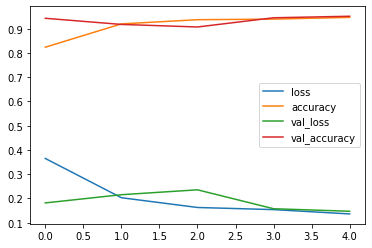

In [12]:
history = pd.DataFrame(model.history.history)
history.plot()

# put your code here 
model.save('my_model.h5')

In [13]:
## Inference
from tensorflow import keras
model = keras.models.load_model('./my_model.h5')

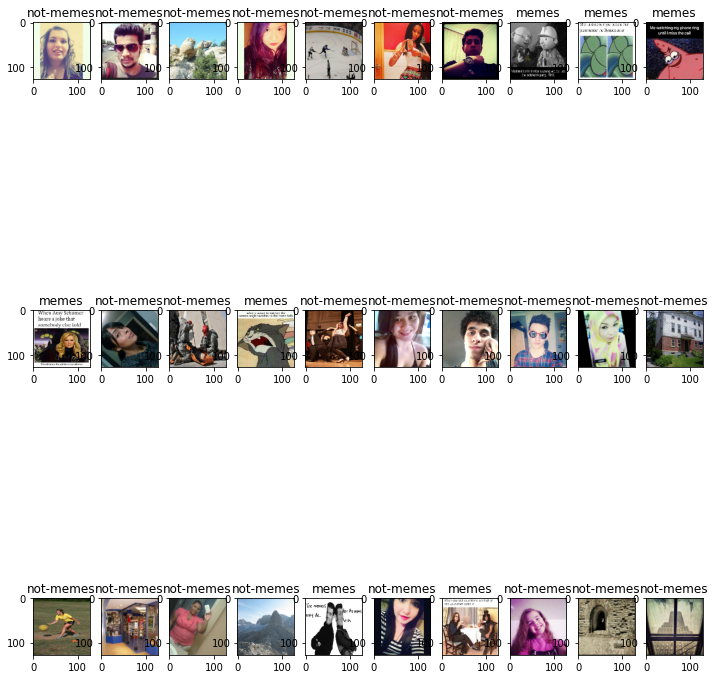

In [36]:
prediction = model.predict_classes(tst_ds)
predictions = []
for i in prediction:
    predictions.append(class_names[i])
plt.figure(figsize=(12,15))
for s,label  in tst_ds.take(1):
        for i in range(30):
            plt.subplot(3,10,i+1)
            plt.imshow(s[i].numpy().astype("uint8"))
            plt.title(predictions[i])

In [24]:
'''true_labels = []
for ims, labs in tst_ds:
    for i in range(0,len(tst_ds)):

        true_labels.append(class_names[labels[i]])
        

predictions = []
for i in prediction:
    predictions.append(class_names[i])
'''

/home/mapin/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:459: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
predictions = []
reallabels = []
for im,lab in tst_ds:
    prediction = model.predict_classes(im)
    print(lab.numpy().tolist())
    print(prediction.tolist())
    print(confusion_matrix(lab.numpy().tolist(), prediction.tolist()))
    print(classification_report(lab.numpy().tolist(), prediction.tolist()))
    
    
    

    

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
[[ 7  1]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        24

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[[ 4  0]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.96      0.98        28

    accuracy                           0.97        32
   macro avg       0.90      

In [ ]:
'''## Inference
from tensorflow import keras
model = keras.models.load_model('./model.v1.h5')'''

In [47]:
image = tf.keras.preprocessing.image.load_img('./dataset/val/memes/image_5906.png',target_size =(img_height, img_width) )
input_arr = tf.keras.preprocessing.image.img_to_array(image)

input_arr = np.array([input_arr])  # Convert single image to a batch.

predictions = model.predict_classes(input_arr)

class_names[predictions[0]]




'memes'